CENG499 Project
----------------
Berkay ÇINAR - 201511013
Celal ŞAHİN - 201411056
Onur Ata SARITAŞ - 201511049

In [256]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [257]:
#Collecting data and checking if there is any trouble
ow_raw = pd.read_csv("season9.csv")
ow_raw.head(5)

,Game #,Start SR,End SR,SR Change,Team SR avg,Enemy SR avg,Team Stack,Enemy Stack,Role 1,Role 2,...,Obj_time_career,Obj_time_medal,Dmg,Dmg_career,Dmg_medal,Heal,Heal_career,Heal_medal,Death,Death_career
0,108,1806,1787,-19,1831,P,NaN,NaN,Support,NaN,...,01:32,NaN,10615.0,5435.0,NaN,9711.0,7844.0,NaN,13.0,6.65
1,109,1787,1787,0,1836,1847,NaN,NaN,Offense,Support,...,01:27,NaN,5973.0,5246.0,NaN,1958.0,6651.0,NaN,6.0,6.97
2,110,1787,1812,25,1817,1818,NaN,NaN,Tank,NaN,...,01:27,Bronze,6959.0,5257.0,Silver,0.0,6594.0,None,5.0,6.95
3,111,1812,1841,29,1827,1839,NaN,NaN,Support,NaN,...,01:32,None,5601.0,5448.0,None,10719.0,7851.0,Gold,8.0,6.64
4,112,1841,1866,25,1900,1891,4.0,3.0,Tank,Support,...,01:27,None,2658.0,5251.0,None,2330.0,6608.0,Silver,5.0,6.96


In [258]:
#Checking the shape and attributes of the dataset
ow_raw.index

RangeIndex(start=0, stop=207, step=1)

In [259]:
ow_raw.columns

Index(['Game #', 'Start SR', 'End SR', 'SR Change', 'Team SR avg',
       'Enemy SR avg', 'Team Stack', 'Enemy Stack', 'Role 1', 'Role 2',
       'Result', 'Streak', 'Leaver', 'Map', 'Match Time', 'Elim',
       'Elim_career', 'Elim_medal', 'Obj_kills', 'Obj_kills_career',
       'Obj_kills_medal', 'Obj_time', 'Obj_time_career', 'Obj_time_medal',
       'Dmg', 'Dmg_career', 'Dmg_medal', 'Heal', 'Heal_career', 'Heal_medal',
       'Death', 'Death_career'],
      dtype='object')

In [260]:
#Checking the sum of null values in attributes
ow_raw.isnull().sum()

Game #                0
Start SR              0
End SR                0
SR Change             0
Team SR avg           0
Enemy SR avg          0
Team Stack            4
Enemy Stack           4
Role 1                0
Role 2              167
Result                0
Streak                0
Leaver                0
Map                   0
Match Time            2
Elim                  2
Elim_career           2
Elim_medal            2
Obj_kills             2
Obj_kills_career      2
Obj_kills_medal       3
Obj_time              2
Obj_time_career       2
Obj_time_medal        3
Dmg                   2
Dmg_career            2
Dmg_medal             3
Heal                  1
Heal_career           4
Heal_medal            3
Death                 2
Death_career          2
dtype: int64

In [261]:
#Backup of raw data if everything goes wrong
ow_bk = ow_raw

In [262]:
#Deleting datapoints which lack necessary data
ow_denull = ow_raw[ow_raw['Team Stack'].isnull() == False]
ow_denull = ow_denull[ow_denull['Heal_career'].isnull() == False]

In [263]:
#Role2 being none has no effect on the game.
ow_denull.isnull().sum()

Game #                0
Start SR              0
End SR                0
SR Change             0
Team SR avg           0
Enemy SR avg          0
Team Stack            0
Enemy Stack           0
Role 1                0
Role 2              160
Result                0
Streak                0
Leaver                0
Map                   0
Match Time            0
Elim                  0
Elim_career           0
Elim_medal            0
Obj_kills             0
Obj_kills_career      0
Obj_kills_medal       0
Obj_time              0
Obj_time_career       0
Obj_time_medal        0
Dmg                   0
Dmg_career            0
Dmg_medal             0
Heal                  0
Heal_career           0
Heal_medal            0
Death                 0
Death_career          0
dtype: int64

In [264]:
#Updated shape of the dataset
ow_denull.shape

(199, 32)

In [265]:
#Measuring the mean of the SR. 
#SR: Points used in the game which denote the player's rank according to his/her skills. Higher is better.
ow_denull['End SR'].mean()

2309.381909547739

In [266]:
fig = ow_denull.sort_values('SR Change', ascending=False)

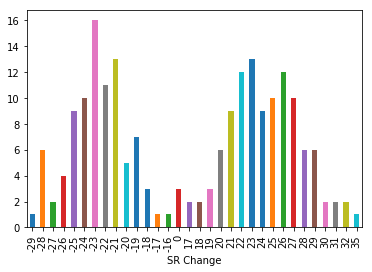

In [267]:
fig.groupby('SR Change').size().plot(kind='bar')

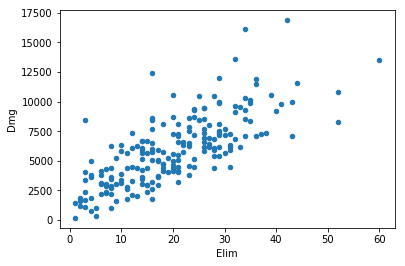

In [268]:
fig.plot.scatter(x='Elim', y='Dmg')

hi
